   ## Por qué usar un lenguaje de programación?

***- Reproducibilidad***

Puede ser replicado por otras personas. Uno de los fundamentos de todo el método científico.


***- Documentación***

Puedes (y debes) comentar sobre las operaciones o procesos aplicados, y que cualquiera pueda entender los pasos y los motivos.


***- Errores de dedo***

Al automatizar las operaciones, se evitan errores humanos

***- No se modifica directamente el archivo***

El entorno te permite "jugar" con los datos sin modificar el original, y al final guardar los cambios en un archivo nuevo.

***- Funciones de estadística descriptiva***

Dan el resumen de las variables sin tocar los datos

***- Storytelling ***

Permite crear una historia sobre cómo fueron limpiados/tratados/visualizados los datos

# Bike Riding Data Exploration

## January 2019

![fordgobike2](fordgobike2.png)

http://amaconferencecentersspeak.com/the-ford-gobike-grab-a-bike-and-go-in-san-francisco/

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline


Exploratory and explanatory analysis regarding bike rides in the Bay Area in California during 2018.

All of the explored data was obtained from the [Ford GoBike System Data](https://www.fordgobike.com/system-data), 2018 datasets.

![fordgobike3](fordgobike3.png)


In [39]:
# load in the datasets into a pandas dataframe, 
jan = pd.read_csv('201801-fordgobike-tripdata.csv')
feb = pd.read_csv('201802-fordgobike-tripdata.csv')
mar = pd.read_csv('201803-fordgobike-tripdata.csv')
apr = pd.read_csv('201804-fordgobike-tripdata.csv')
may = pd.read_csv('201805-fordgobike-tripdata.csv')
jun = pd.read_csv('201806-fordgobike-tripdata.csv')
jul = pd.read_csv('201807-fordgobike-tripdata.csv')
aug = pd.read_csv('201808-fordgobike-tripdata.csv')
sep = pd.read_csv('201809-fordgobike-tripdata.csv')
octo = pd.read_csv('201810-fordgobike-tripdata.csv')
nov = pd.read_csv('201811-fordgobike-tripdata.csv')
dec = pd.read_csv('201812-fordgobike-tripdata.csv')
rides = jan.append(feb).append(mar).append(apr).append(may).append(jun).append(jul).append(aug).append(sep).append(octo).append(nov).append(dec)

In [41]:
# save into csv
rides.to_csv('2018-fordgobike-tripdata.csv', encoding='utf-8', index=False)

In [3]:
# load csv
rides = pd.read_csv('2018-fordgobike-tripdata.csv')

In [4]:
# Make a copy of the rides dataset
rides2 = rides.copy()

# convert start_time and end_time into timestamp type
rides2['start_time'] = pd.to_datetime(rides2['start_time'])
rides2['end_time'] = pd.to_datetime(rides2['end_time'])

### The statistics of the dataset

In [265]:
# print statistics
# high-level overview of data shape and composition
print('Rows and columns: ' + str(rides.shape))
print('')
print(rides.dtypes)

Rows and columns: (1863721, 16)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [6]:
print(rides.head())

   duration_sec                start_time                  end_time  \
0         75284  2018-01-31 22:52:35.2390  2018-02-01 19:47:19.8240   
1         85422  2018-01-31 16:13:34.3510  2018-02-01 15:57:17.3100   
2         71576  2018-01-31 14:23:55.8890  2018-02-01 10:16:52.1160   
3         61076  2018-01-31 14:53:23.5620  2018-02-01 07:51:20.5000   
4         39966  2018-01-31 19:52:24.6670  2018-02-01 06:58:31.0530   

   start_station_id                                 start_station_name  \
0             120.0                               Mission Dolores Park   
1              15.0  San Francisco Ferry Building (Harry Bridges Pl...   
2             304.0                               Jackson St at 5th St   
3              75.0                           Market St at Franklin St   
4              74.0                              Laguna St at Hayes St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.761420              -122.426435        

In [286]:
# descriptive statistics for numeric variables
print(rides2.describe())

       duration_sec  start_station_id  start_station_latitude  \
count  1.863721e+06      1.851950e+06            1.863721e+06   
mean   8.573026e+02      1.196744e+02            3.776678e+01   
std    2.370379e+03      1.003976e+02            1.057689e-01   
min    6.100000e+01      3.000000e+00            3.726331e+01   
25%    3.500000e+02      3.300000e+01            3.777106e+01   
50%    5.560000e+02      8.900000e+01            3.778107e+01   
75%    8.720000e+02      1.860000e+02            3.779625e+01   
max    8.636600e+04      3.810000e+02            4.551000e+01   

       start_station_longitude  end_station_id  end_station_latitude  \
count             1.863721e+06    1.851950e+06          1.863721e+06   
mean             -1.223492e+02    1.181730e+02          3.776690e+01   
std               1.654634e-01    1.004403e+02          1.056483e-01   
min              -1.224737e+02    3.000000e+00          3.726331e+01   
25%              -1.224114e+02    3.000000e+01        

In [5]:
rides2['member_birth_year'].describe()

count    1.753003e+06
mean     1.983088e+03
std      1.044289e+01
min      1.881000e+03
25%      1.978000e+03
50%      1.985000e+03
75%      1.991000e+03
max      2.000000e+03
Name: member_birth_year, dtype: float64

### What is the structure of your dataset?      

There are 1,863,721 rides in the dataset with 16 features, which can be clustered in this way: ride duration data (time and date), start and end stations data (location), bike id (numeric), and user data(categorical nominal).

There are 331 station ids, 348 station names, and 5054 bikes. <p>
Two user types: Subscribers and Customers<p>
And member genders: Male, Female, NaN
    

### What is the main feature(s) of interest in your dataset?

I'm most interested in looking for ***user type patterns*** crossed with ride duration, time of the year usage, and start and end stations. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I would like to know if there are any trends in user type bike usage.

I believe that during vacation season there are more Customers rides than during not vacation season.

I'm wondering if there are any periods of time (months or weeks) in which there are user type differences.

Also, I would check the most used stations by each type of user

## Univariate Exploration

### user_type
I'll start by looking at the distribution of the main variable of interest: user type.

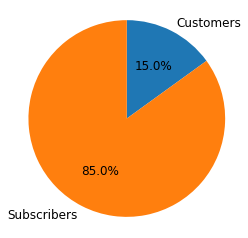

In [45]:

sorted_user_type = rides2['user_type'].value_counts()
sizes1 = [sorted_user_type['Customer']/sorted_user_type.sum()*100, sorted_user_type['Subscriber']/sorted_user_type.sum()*100]
labels1 = ['Customers', 'Subscribers']

#plt.subplot(1,2,1)
patches, texts, autotexts =plt.pie(sizes1, labels=labels1, startangle=90, autopct='%1.1f%%', counterclock=False);
autotexts[0].set_fontsize(12)
autotexts[1].set_fontsize(12)
texts[0].set_fontsize(12)
texts[1].set_fontsize(12)
plt.axis('square');


In [6]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

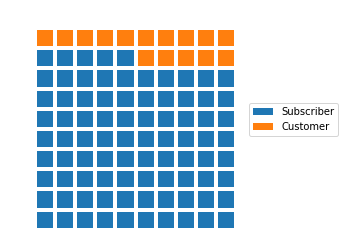

In [9]:
waffle_counts = percentage_blocks(rides2, 'user_type')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');

Subscribers are 5.7 times the count of customers. 

### duration_secs

From the statistics, we saw that the values up to percentile 75 were plausible: 938 secs = a 15 minute ride.

The maximum value is 86369 = 24 hours ride. 

We'll check out what is happening in the before and after minute 45.

In [7]:
print('Minimum ride in minutes ' +str(datetime.timedelta(seconds=61)))
print('Percentile 75 in minutes ' +str(datetime.timedelta(seconds=872)))
print('Maximum ride in minutes ' +str(datetime.timedelta(seconds=86366)))
print('45 minutes in seconds: ' +str(datetime.timedelta(minutes=45).total_seconds()))

Minimum ride in minutes 0:01:01
Percentile 75 in minutes 0:14:32
Maximum ride in minutes 23:59:26
45 minutes in seconds: 2700.0


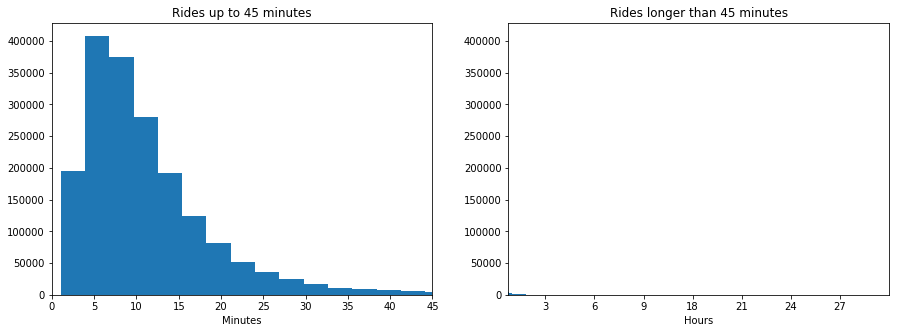

In [16]:
plt.figure(figsize=[15,5])

xtick_locs = np.arange(0, 2701, 300)
xtick_names = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.subplot(1,2,1)
plt.hist(data = rides2, x = 'duration_sec', bins=500);
plt.xlim([0,2700])
plt.xlabel('Minutes')
plt.xticks(xtick_locs, xtick_names)
plt.title('Rides up to 45 minutes');

xtick_locs2 = np.arange(10800, 80000, 10800)
xtick_names2 = [3, 6, 9, 18, 21, 24, 27]

plt.subplot(1,2,2)
plt.hist(data = rides2, x = 'duration_sec', bins=500);
plt.xlim([2701,86369])
plt.xlabel('Hours')
plt.xticks(xtick_locs2,xtick_names2)
plt.title('Rides longer than 45 minutes');


There is no reason to keep values greater than 45 minutes into our analysis.

Some people locks uncorrectly the bikes... some others loose, forget or prank bikes

![fordgobike4](fordgobike4.jpg)


In [9]:
rides_longer_than_45min = rides2.query('duration_sec > 2700')
rides2 = rides2.drop(list(rides_longer_than_45min.axes[0]), axis=0)
rides2 = rides2.reset_index(drop=True)
rides2.query('duration_sec > 2700')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


Now let's plot again 

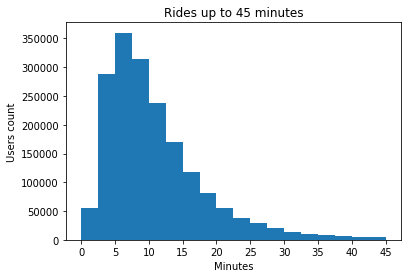

In [10]:
bin_edges = np.arange(0, 2700+150, 150)
tick_locs = np.arange(0, 2701, 300)
tick_names = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.hist(data = rides2, x = 'duration_sec', bins=bin_edges);
plt.xticks(tick_locs, tick_names)
plt.xlabel('Minutes')
plt.ylabel('Users count')
plt.title('Rides up to 45 minutes');

The peak of use is between 5 and 10 minutes rides while the second place is between 10 and 15 minute rides.

### start_time

We'll continue our exploration with the time of the year usage creating a new column named 'month' based on the start_time variable

In [11]:
rides2['month'] = pd.DatetimeIndex(rides2['start_time']).month

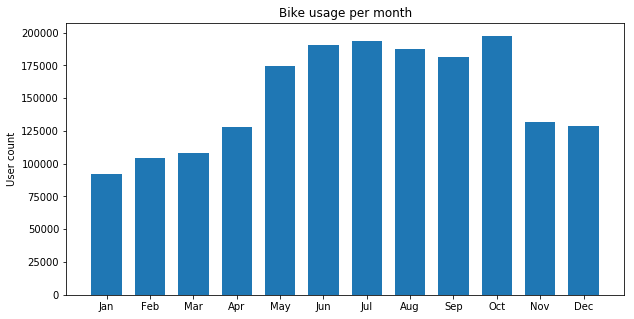

In [12]:
#y_locs = [25000,50000,75000,100000, 125000, 150000, 175000, 200000]
#y_labels = ['25k','50k','75k','100k','125k','150k', '175k', '200k']

plt.figure(figsize=[10,5])
bin_edges = np.arange(0.5, 12.5+1, 1)
plt.hist(data = rides2, x='month', bins=bin_edges, rwidth=0.7  )
xmonths = ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(np.arange(1, 12+1, 1), xmonths)
plt.ylabel('User count')
plt.title('Bike usage per month');
#plt.yticks(y_locs, y_labels);

Months from May to October have higher ride rates

Months from November to April show a low ride rate, being january the lowest.

Comparing visually with the average yearly temperatures in California shown by a weather provider (https://www.holiday-weather.com/san_francisco/averages/)


![temp](avg_high_low_temp.png)

And also the rain season 

![rain](avg_rain.png)


From the images we can say that: 
- May to october were the peak months of bike usage 
- June to november were the warmer months 
- May to september-october were the months with lower rain days

This coincides with some researches about the effects of weather conditions on cycling papers.(https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/met.6) 

Besides, a quick research about weather in California during 2018 shows two events:
1. July as the hottest month in 124 years of recordkeeping, with 79.7 degrees (26.5 C)
(https://weather.com/news/climate/news/2018-08-08-july-hottest-month-on-record-california)

2. The wildfires in California during november, which also affected the air quality during several days.
(https://www.theguardian.com/us-news/2018/nov/12/california-wildfires-bay-area-smoke-haze-air-quality-pollution)


The sudden drop-off in november could be related to these wildfires, but it is important to notice that<b> none of these thoughts are implying causality.</b>

![fordgobike6](fordgobike6.jpg)
(https://www.foxnews.com/us/smoke-from-camp-fire-smothering-california-cities-shuttering-popular-attractions-in-san-francisco)

### end_station_latitude, end_station_longitude

A bivariate plot will be used due to the nature of coordinates. 

This will lead us to an univariate analysis of a new variable named ***zone***.


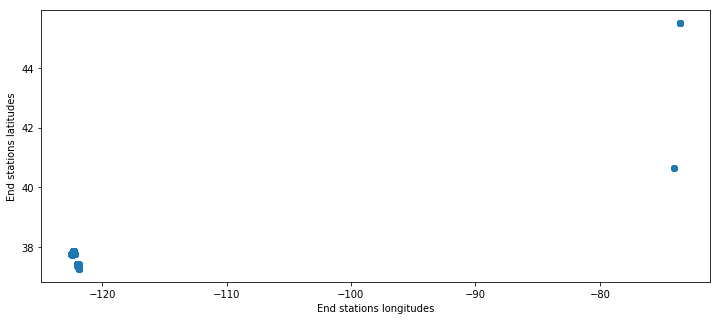

In [13]:
plt.figure(figsize=[12,5])
plt.scatter(data=rides2, x='end_station_longitude', y='end_station_latitude')
plt.xlabel('End stations longitudes')
plt.ylabel('End stations latitudes');

I marked in Google Maps https://goo.gl/maps/tC2Cre1D5dE2 the 3 zones provided by Ford GoBike to get approximate coordinates:

    - San Francisco aproximate      37.7797002,-122.4203517
    - East Bay aproximate           37.7986456,-122.2657993
    - San Jose Downtown aproximate  37.33249,-121.8920308
    
Longitudes greater than -80 are definitely not in California, so let's drop those values and re-plot

In [14]:
long_greater_than_min80 = rides2.query('end_station_longitude > -80')
rides2 = rides2.drop(list(long_greater_than_min80.axes[0]), axis=0)
rides2 = rides2.reset_index(drop=True)
rides2.query('end_station_longitude > -80')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month


In [15]:
start_long_greater_than_min80 = rides2.query('start_station_longitude > -80')
rides2 = rides2.drop(list(start_long_greater_than_min80.axes[0]), axis=0)
rides2 = rides2.reset_index(drop=True)
rides2.query('start_station_longitude > -80')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month


And now redraw the scatterplot.

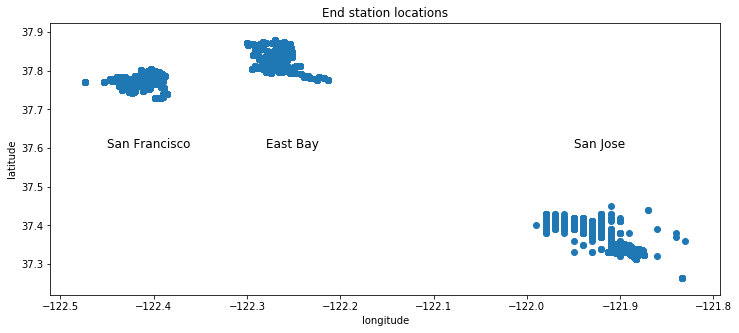

In [268]:
plt.figure(figsize=[12,5])
plt.scatter(data=rides2, x='end_station_longitude', y='end_station_latitude')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('End station locations')

plt.text(-122.45,37.6, 'San Francisco', fontsize=12)
plt.text(-122.28,37.6, 'East Bay', fontsize=12)
plt.text(-121.95,37.6, 'San Jose', fontsize=12);

From the scatterplot, we'll set longitude delimeters for each zone. A new ***zone*** column will be created and described with a barchart
    - San Francisco aproximate      -122.5 to -122.35
    - East Bay aproximate           -122.34 to -122.15
    - San Jose Downtown aproximate  -122.0 to -121.8

In [17]:
rides2.loc[rides2['end_station_longitude'] < -122.35, 'zone'] = 'San Francisco'
rides2.loc[rides2['end_station_longitude'] > -122, 'zone'] = 'San Jose'
rides2.loc[(rides2['end_station_longitude'] >-122.34) & (rides2['end_station_longitude'] < -122.15), 'zone'] = 'East Bay'

In [18]:
rides2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,zone
0,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No,1,San Francisco
1,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No,1,San Francisco
2,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes,1,San Francisco
3,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes,1,San Jose
4,1316,2018-01-31 23:24:00.416,2018-01-31 23:45:56.824,98.0,Valencia St at 16th St,37.765052,-122.421866,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,1278,Customer,NaN,NaN,No,1,San Francisco


The new variable will be described with a barchart.

In [107]:
sorted_zones

San Francisco    1328682
East Bay          392966
San Jose           96251
Name: zone, dtype: int64

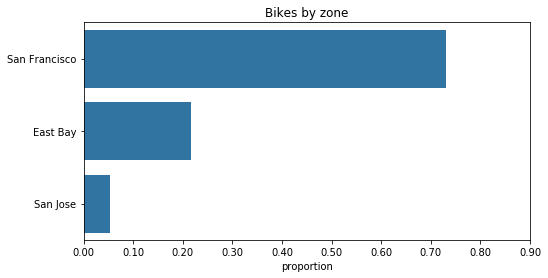

In [19]:
# Order
sorted_zones = rides2['zone'].value_counts()
zones_order = sorted_zones.index

# Proportions
n_points = rides2.shape[0]
all_zones = rides2['zone']
max_proportion =  sorted_zones[0]/sorted_zones.sum()

#tick mark locations and names
tick_props = np.arange(0, max_proportion+0.2, 0.1)
tick_locs = tick_props*sorted_zones.sum()
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#create the plot
plt.figure(figsize=[8,4])
base_color = sb.color_palette()[0]
sb.countplot(data = rides2, y='zone', color=base_color, order=zones_order);
plt.xlabel('proportion')
plt.ylabel('')
plt.xticks(tick_locs, tick_names)
plt.title('Bikes by zone');

In [20]:
 sorted_zones/sorted_zones.sum()

San Francisco    0.730889
East Bay         0.216165
San Jose         0.052946
Name: zone, dtype: float64

The San Francisco zone has 73% of the bicycles, while East Bay has the 21.6%, and San Jose has 5.3%

### member_birth_year

As a first action, let's create a column with the (aproximate) age of the riders in 2018, so the plots are more easily read, and plot a histogram.

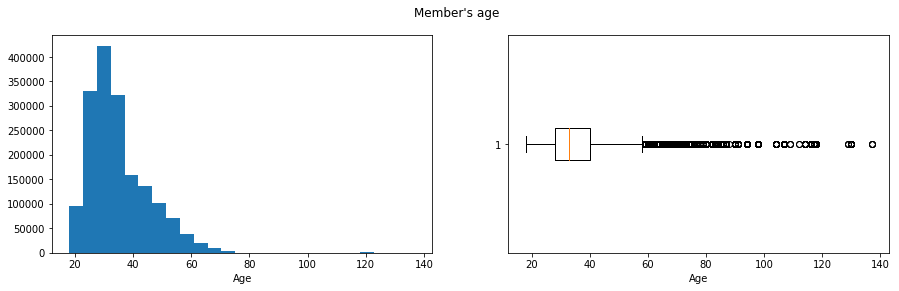

In [21]:
rides2['age_in_2018'] = 2018 - rides2['member_birth_year']

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.hist( data = rides2.dropna(), x='age_in_2018', bins=25)
plt.xlabel('Age')

plt.subplot(1,2,2)
plt.boxplot(data = rides2.dropna(), x= 'age_in_2018', vert=False, meanline=True)
plt.ylabel('')
plt.xlabel('Age')

plt.suptitle("Member's age");

In [22]:
rides2['age_in_2018'].quantile([0.25,0.5,0.75,1])

0.25     27.0
0.50     33.0
0.75     40.0
1.00    137.0
Name: age_in_2018, dtype: float64

This is a left-skewed histogram which varies ages between 18 and 88 years old. 75% of the riders have between 18 an 40 years.

It is unlikely that many bikers are older than 100 years. We are not sure about which ages have digit errors and which are right, but I think the best is to change the values greater than 80yo (1938) to NaN.

In [23]:
indexes = list(rides2.query('member_birth_year < 1938').index)
for row in indexes:
    rides2.iloc[row, 13] = np.nan  #change member_birth_year
    rides2.iloc[row, 18] = np.nan  #change age_in_2018
rides2.query('member_birth_year < 1938')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,zone,age_in_2018


Now we can redraw the member's age histogram and boxplot:

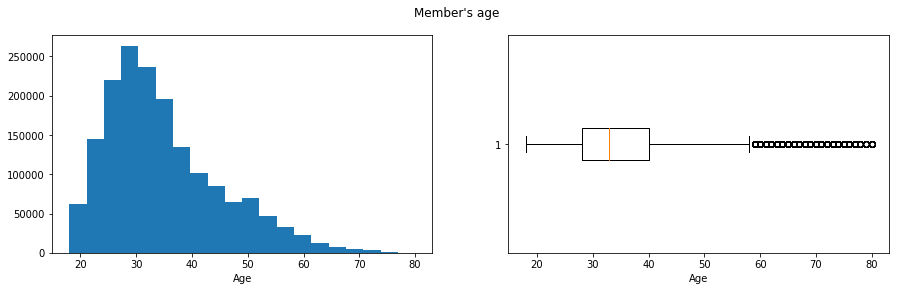

In [33]:
rides2['age_in_2018'] = 2018 - rides2['member_birth_year']

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.hist( data = rides2.dropna(), x='age_in_2018', bins=20)
plt.xlabel('Age')

plt.subplot(1,2,2)
plt.boxplot(data = rides2.dropna(), x= 'age_in_2018', vert=False, meanline=True)
plt.ylabel('')
plt.xlabel('Age')

plt.suptitle("Member's age");

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variable user_type has only two values, where the suscribers are the big majority over against the customers, probably. The first ones have unlimited 45-min trips for \$15 a month. The second ones have purchased either the \$2 one trip, or the \$10 one day.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- When investigating the duration_sec variable, a number of outlier points were identified. These could have appeared due to errors when locking the bicycles, so the rides longer than 45min were ruled out.

- The stations locations (end_station_latitude, end_station_longitude, start_station_latitude, and start_station_longitude vars) were drawed as latitude and longitude pairs, and discarded the ones with longitudes greater than -80, locations which don't belong to California. There were 3 blobs recognized as San Francisco, East Bay and San Jose, so a new variable ***zone*** was created.

- The month of the given ride was extracted from the start_time variable. There were more rides between may and october. The variable month was visually compared with temperature and rain yearly averages. Also a little research about weather events in California in 2018 pointed out the big fires during november, which coincide with the bike usage fall down in november.

- From the member_birth_year variable, years lower than 1930 were ruled out (88yo in 2018)

## Bivariate Exploration



### duration_sec & member_birth_year
To start off with, I want to scatterplot the two numeric variables of our study.

We'll start creating a 1000 rows sample from the rides2 dataframe, and later we'll create a scatterplot with the member's birth year, and the duration of rides displayed in minutes.

In [34]:
rides2_samp = rides2.sample(n= 1000, replace = False)
rides2_samp.reset_index()
rides2_samp.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,zone,age_in_2018
68990,267,2018-01-11 07:22:49.325,2018-01-11 07:27:17.053,226.0,26th Ave at International Blvd,37.781123,-122.232991,234.0,Fruitvale Ave at International Blvd,37.777682,-122.225771,2463,Subscriber,1975.0,Male,Yes,1,East Bay,43.0
2696,1098,2018-01-31 11:02:26.521,2018-01-31 11:20:44.682,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,45.0,5th St at Howard St,37.781752,-122.405127,609,Customer,1988.0,Female,No,1,San Francisco,30.0
1160141,604,2018-08-03 17:12:39.074,2018-08-03 17:22:43.834,81.0,Berry St at 4th St,37.775880,-122.393170,22.0,Howard St at Beale St,37.789756,-122.394643,310,Subscriber,1977.0,Male,No,8,San Francisco,41.0
1415950,261,2018-10-23 08:57:43.257,2018-10-23 09:02:05.099,251.0,California St at University Ave,37.870555,-122.279720,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,3482,Subscriber,1971.0,Female,No,10,East Bay,47.0
1169173,530,2018-08-02 10:23:39.529,2018-08-02 10:32:30.107,303.0,San Pedro St at Hedding St,37.352601,-121.905733,341.0,Fountain Alley at S 2nd St,37.336188,-121.889277,2197,Subscriber,1985.0,Male,No,8,San Jose,33.0


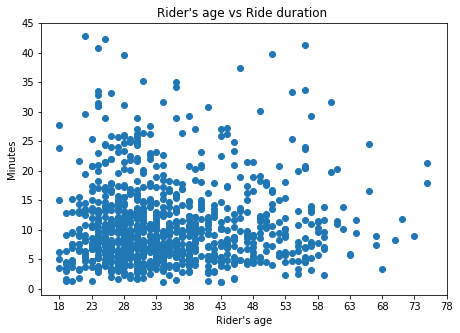

In [263]:
plt.figure(figsize=[16,5])
# tick marks every 5 minutes.
# 5 minutes is equivalent to 300 seconds. 2700 seconds divided by 300 seconds gives us 9 bins.
ytick_locs = np.arange(0, 2701, 300)
ytick_names = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
xtick_locs = np.arange(18, 80+1, 5)

plt.subplot(1,2,1)
plt.scatter(data=rides2_samp, x='age_in_2018', y='duration_sec');
plt.xlabel("Rider's age")
plt.ylabel('Minutes')
plt.yticks(ytick_locs, ytick_names)
plt.xticks(xtick_locs, xtick_locs)
plt.title("Rider's age vs Ride duration ");


As expected, the younger the riders, the more rides they make. In general, the more frequent rides are of less than 20 minutes.

We'll perform now a heat map to make more clear this distribution.

/home/liliana/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


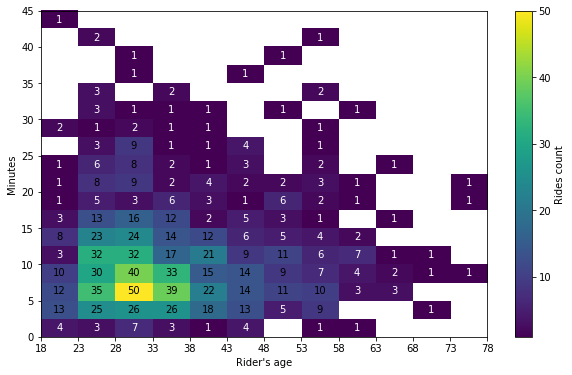

In [260]:
plt.figure(figsize=[10,6])

# tick marks every 5 minutes.
# 5 minutes is equivalent to 300 seconds. 2700 seconds divided by 300 seconds gives us 9 bins.
ytick_locs = np.arange(0, 2700+150, 300)
ytick_names = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
xtick_locs = np.arange(18, 80+1, 5)
#xtick_names = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


# bin edges
    # from 18 to 80 years old, bins each 5 years
xbin_edges = np.arange(18, 80+1, 5)
ybin_edges = np.arange(0, 2700+150, 150)

h2d = plt.hist2d(data = rides2_samp, x='age_in_2018', y='duration_sec', cmin=0.5,
          bins=[xbin_edges, ybin_edges], cmap='viridis')
counts = h2d[0]

#add text in each cell
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c>= 8  : # white characters on dark cells
            plt.text(xbin_edges[i] + 2.5, ybin_edges[j] + 80, int(c),
                    ha = 'center', va='center', color='black')
        elif c>0  : # black characters on light cells
            plt.text(xbin_edges[i] + 2.5, ybin_edges[j] + 80, int(c),
                    ha = 'center', va='center', color='white')


plt.yticks(ytick_locs, ytick_names)
plt.xticks(xtick_locs, xtick_locs)
plt.colorbar(label='Rides count')
plt.xlabel("Rider's age")
plt.ylabel('Minutes');

- users between 18 and 23 years old are not as active as we could think
- rides lower than 2.5 minutes, or longer than 35 minutes, are not common for anyone
- the most active users are those between 28 and 33 years old


### User_type & ride duration

I believe that most of the customers do recreational bicycling, like visitors who want to sightsee in the city and who probably won't stay many days; while most of the subscriptors may do commuting by bicycle, like people who live in the city.

How do you think they spend the time in bicycle?

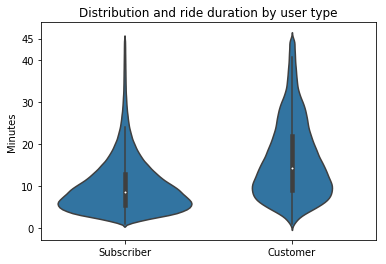

In [44]:
tick_locs = [0,600,1200,1800,2400,2700]
tick_names = [0,10,20,30,40,45]
base_color = sb.color_palette()[0]
sb.violinplot(data = rides2, x='user_type', y='duration_sec', color=base_color)
plt.yticks(tick_locs,tick_names)
plt.xlabel('')
plt.ylabel('Minutes')
plt.title('Distribution and ride duration by user type');

In [47]:
usertype_duration.groupby('user_type')['duration_sec'].quantile([0.25,0.5,0.75,1])

user_type       
Customer    0.25     544.0
            0.50     853.0
            0.75    1304.0
            1.00    2700.0
Subscriber  0.25     328.0
            0.50     512.0
            0.75     774.0
            1.00    2700.0
Name: duration_sec, dtype: float64

There are some differences by user type. 
- Subscribers tend to make lots of short rides in bicycle, a median of 8.5 minutes
- Customers can afford longer rides and enjoy the panorama, with a median of 14 minutes

### User_type & time of the year usage

I'd like to decipher the relationship between the user type and the time of the year in an errorbar showing the ride count through the time. The best time interval for this is by month.

For this we must create two dataframes with the ride count by month, one for each user type.

In [49]:
usertype_month = rides2.iloc[:, np.r_[0,1,12, 16] ]
usertype_month = usertype_month.groupby(['user_type','month'], as_index=False)['duration_sec'].count()
usertype_month_cust = usertype_month[usertype_month['user_type'] == 'Customer']
usertype_month_subs = usertype_month[usertype_month['user_type'] == 'Subscriber']

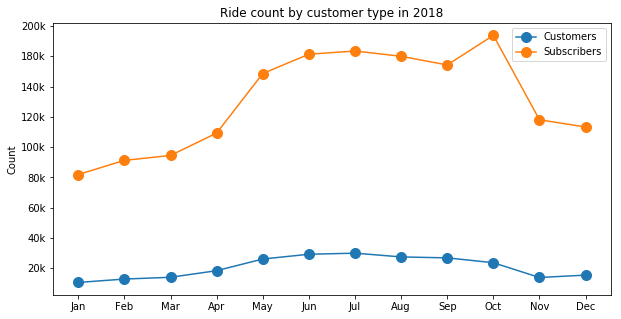

In [51]:
fig = plt.figure(figsize=(10,5) )

x_locs = [1,2,3,4,5,6,7,8,9,10,11,12]
x_labels = ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_locs = [20000,40000,60000,80000,100000, 120000, 140000, 160000, 180000]
y_labels = ['20k','40k','60k','80k','100k','120k','140k', '180k', '200k',]

plt.errorbar(data=usertype_month_cust, x='month', y='duration_sec' , label='Customers',
            mfc='#1F78B4', ms=10, mew=1, marker='o')
plt.errorbar(data=usertype_month_subs, x='month', y='duration_sec', label='Subscribers',
            mfc='#FE7F0E', ms=10, mew=1, marker='o')

plt.legend( loc='upper right');
plt.title('Ride count by customer type in 2018')
plt.ylabel('Count')
plt.xticks(x_locs, x_labels)
plt.yticks(y_locs, y_labels);

In both user types the bikes use increase until July and start to decrease to the end of the year.

The subscribers go from 80k to 190k, a variation of 110k rides! It increased around 2.5 times from January to October. While the customers line has a smaller absolute variation, it goes from 10k to 30k, only 20k rides, July had 3 times the rides count from January.

The sudden rise in october is a surprise, even more that it only seems to appear in subscribers. Do subscribers know something that customers don't? 

### User type & zone

Thinking that most customers are visitors, I believe that most customers would ride mainly in the touristic zones (San Francisco), while most subscriptors would ride both touristic and non touristic zones.

We'll start creatin two user type vs zone dataframes: one with ride count and another with ride percentage.

In [52]:
usertype_zone = rides2_samp.iloc[:, np.r_[0,12,17] ]
usertype_zone=usertype_zone.groupby(['user_type','zone'], as_index=False)['duration_sec'].count()
usertype_zone = usertype_zone.pivot(index='zone', columns='user_type')['duration_sec']
usertype_zone = usertype_zone.sort_values(by='Customer', ascending=True)
usertype_zone

user_type,Customer,Subscriber
zone,,
San Jose,7,54
East Bay,28,174
San Francisco,99,638


In [53]:
usertype_zone_percent = usertype_zone.copy() 
usertype_zone_percent['Customer percentage'] = usertype_zone['Customer'] /(usertype_zone['Customer']+usertype_zone['Subscriber'])*100
usertype_zone_percent['Subscriber percentage'] = usertype_zone['Subscriber'] /(usertype_zone['Customer']+usertype_zone['Subscriber'])*100
usertype_zone_percent = usertype_zone_percent.drop(['Customer', 'Subscriber'], axis=1)
usertype_zone_percent

user_type,Customer percentage,Subscriber percentage
zone,,
San Jose,11.475410,88.524590
East Bay,13.861386,86.138614
San Francisco,13.432836,86.567164


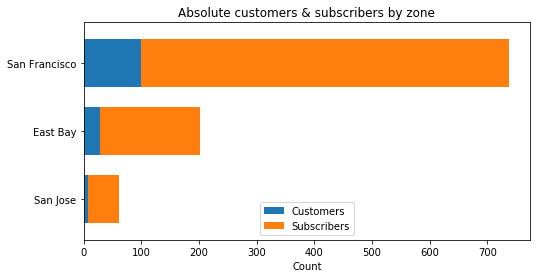

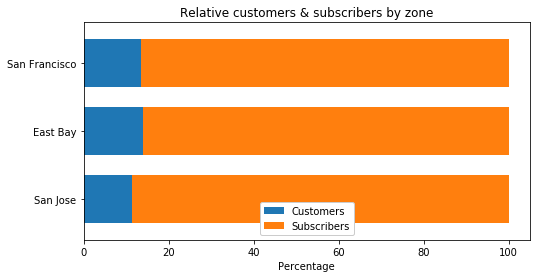

In [54]:
ax = usertype_zone.plot(kind='barh',stacked=True, figsize=[8,4], width=0.7)
plt.title('Absolute customers & subscribers by zone')
plt.ylabel('')
plt.xlabel('Count')
ax.legend(['Customers', 'Subscribers'], loc = 8 );

ax = usertype_zone_percent.plot(kind='barh',stacked=True, figsize=[8,4], width=0.7)
plt.title('Relative customers & subscribers by zone')
plt.ylabel('')
plt.xlabel('Percentage')
ax.legend( ['Customers', 'Subscribers'],loc = 8 , framealpha=1);

From the first plot it is clear as day the great demand of bikes in the San Francisco area, more than East Bay and San Jose together.

From the second plot, the percentages of subscribers in San Jose (90.7%) and East Bay (87.2%) are greater than in San Francisco(85.1%). Maybe most from people who live in the city. 

The percentage of customers in San Francisco(14.9%) is greater than in San Jose (9.26%)and East Bay(12.8%). Maybe most from people who visit the city. 

It is funny but, in the three areas the percentages by type of users don't vary too much.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

About differences by user types:

Subscribers tend to make lots of short rides in bicycle, with a median of 8.5 minutes. In winter there are around 80k-100k rides per month, but in summer there are up to 180k rides per month! and then decreases again. They are the majority in San Francisco, East Bay and San Jose.

Customers can afford longer rides and enjoy the panorama, with a median of 14 minutes. In winter there are around 10k rides per month, and in summere up to 30k rides per month. Not as variable as the other group. The most rided zone by customers is San Francisco.






### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes!, as expected, the younger the riders, the more active they are, but users 18-23 years old are not too active. I observed that the more frequent bike users are those between 24 and 38 years old.

Also, there was an odd ride rate increase during october, but only by the subscribers type, from which is no clear reason. In the next month, november, there was a sudden ride rate decrease, which could be related to the wildfires in California which affected the air quality.

## Multivariate Exploration

### boxplot matrix
To start this third phase, a boxplot matrix with 3 categorical vars (user type, zone, and gender), and two numerical vars (age in 2018 and duration in seconds)

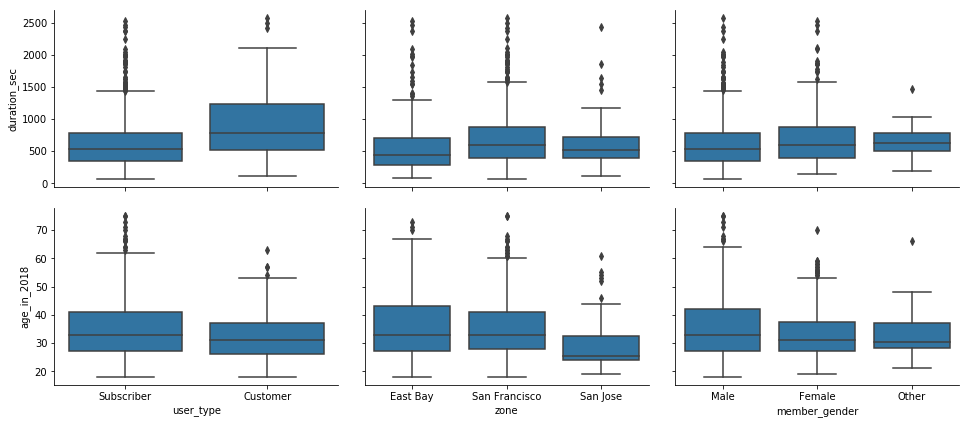

In [252]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

g = sb.PairGrid(data = rides2_samp, y_vars = ['duration_sec', 'age_in_2018'], 
                x_vars = ['user_type', 'zone', 'member_gender'], size = 3, aspect = 1.5)
g.map(boxgrid);


#### For the rides duration
- as in the previous violin plot, there is a clear difference in which customers spend more time in each ride (even though their time limit is only 30min) than subscribers (allowed 45 min per ride).
- in general, in San Francisco users spend more time in bikes than in the other zones.
- there is almost no difference in ride duration by gender

#### For the user's age 
- subscribers age range is wider, while customers have a younger range.
- users in East Bay and San Francisco are pretty similar... while San Jose is full of young riders!
- there is almost no difference in rider's age by gender

### start and end stations by user type

If we plot the coordinates of the start stations by type of users:

- would it be any difference between customers and subscribers?
- would it be the same as the end stations?

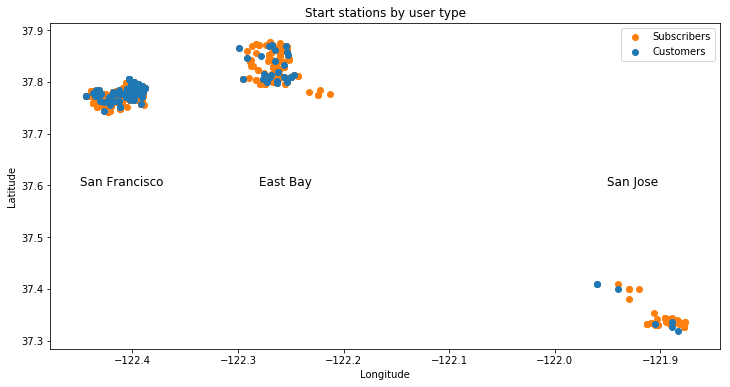

In [249]:
plt.figure(figsize=[12,6])
cat_markers = [['Subscriber','o','#FE7F0E'],
              ['Customer','o', '#1F78B4']]
for cat, marker, u_color in cat_markers:
    rides2_samp_cat = rides2_samp[rides2_samp['user_type']==cat]
    ax = plt.scatter(data=rides2_samp_cat, x='start_station_longitude', y='start_station_latitude'
                     , marker=marker, color=u_color);
    
plt.legend(['Subscribers','Customers'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Start stations by user type')

plt.text(-122.45,37.6, 'San Francisco', fontsize=12)
plt.text(-122.28,37.6, 'East Bay', fontsize=12)
plt.text(-121.95,37.6, 'San Jose', fontsize=12);


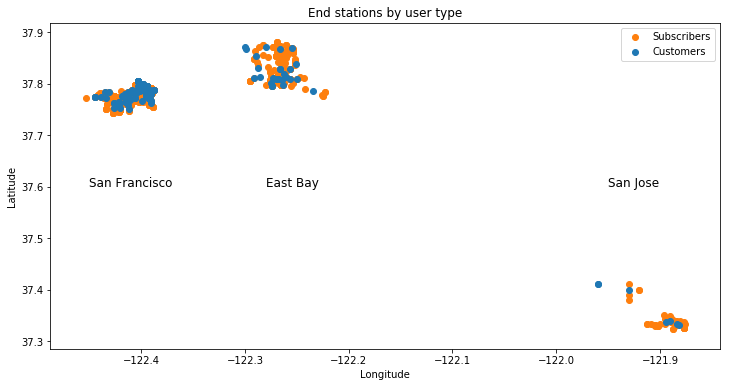

In [250]:
plt.figure(figsize=[12,6])
cat_markers = [['Subscriber','o','#FE7F0E'],
              ['Customer','o', '#1F78B4']]
for cat, marker, u_color in cat_markers:
    rides2_samp_cat = rides2_samp[rides2_samp['user_type']==cat]
    ax = plt.scatter(data=rides2_samp_cat, x='end_station_longitude', y='end_station_latitude'
                     , marker=marker, color=u_color);
    
plt.legend(['Subscribers','Customers'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('End stations by user type')

plt.text(-122.45,37.6, 'San Francisco', fontsize=12)
plt.text(-122.28,37.6, 'East Bay', fontsize=12)
plt.text(-121.95,37.6, 'San Jose', fontsize=12);


#### - Would it be any difference between customers and subscribers?

In San Francisco, almost the same start&end stations are used by both type of users.
In East Bay and San Jose, there are only a few stations used by customers, and many more used by subscribers.

#### - Would it be the same as the end stations?

Yes, it is almost the same kind of use. Customers and subscribers park and get bikes almost in the same stations.

### Talk about some of the relationships you observed in this part of the investigation.

- ***Customers*** 
    - Are users who love riding mainly in San Francisco area, but not much on East Bay, and less in San Jose. 
    - They spend a wide time enjoying the panorama.
    - Make a media of 14 minutes rides, even though their time limit is only 30min. 
    - Their age ranges between late 20's and late 30's. 
    - Their use throughout the year is related to the season events, but generally steady.
    - The maximum usage was 30k rides in July, 3 times the January usage.


- ***Subscribers*** 
    - Are users who equally ride the three mentioned areas. 
    - They make lots of quick rides in bicycle
    - Make a media of 8.5 minutes rides, even though they're allowed 45 min per ride, many could be commutes. 
    - Their age ranges mainly between late 20's and early 40's. 
    - Their use throughout the year is also related to the season events, but unpredictable or unknown events may affect their use. 
    - The maximum usage was 190k rides in October, 2.5 times the January usage.



### Were there any interesting or surprising interactions between features?

Some astonishing findings encountered:

- Users between 18 and 23 years old are not as active as we could think, and the most active users are those between 28 and 33 years old.

- Regarding the zones and rider's age, in which San Jose users are boldly younger than in other zones.

- The unknown reason of having a sharp high rate of subscribers in October, and the sudden drop-off in November.

- Even when San Francisco has an outstanding greater percentage of customers than East Bay and San Jose, the absolute values of customers in the three areas is not varying a lot.


<center>
###  Thank you!
![fordgobike5](fordgobike5.jpg)
(https://mtc.ca.gov/whats-happening/news/ford-gobike-announces-innovative-miles-miles-partnership-alaska-airlines)

## References

Using conditional to generate new column in pandas dataframe <b>(Definitely the fastest way!)</b>

https://stackoverflow.com/questions/27041724/using-conditional-to-generate-new-column-in-pandas-dataframe

How do I convert seconds to hours, minutes and seconds?

https://stackoverflow.com/questions/775049/how-do-i-convert-seconds-to-hours-minutes-and-seconds

Extract month and year from column in Pandas, create new column

https://erikrood.com/Python_References/extract_month_year_pandas_final.html

Histogram plotting “AttributeError: max must be larger than min in range parameter

https://stackoverflow.com/questions/42014687/histogram-plotting-attributeerror-max-must-be-larger-than-min-in-range-paramet?rq=1

Count plot with stacked bars per hue

https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue

Set labels size on a pie chart

https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python

numpy.linspace

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy-linspace

Setting different color for each series in scatter plot on matplotlib

https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib

Pandas pivot table

http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

Pandas melt

https://www.geeksforgeeks.org/python-pandas-melt/

### Comparisons between R & Python

https://towardsdatascience.com/data-science-101-is-python-better-than-r-b8f258f57b0f

https://spectrum.ieee.org/static/interactive-the-top-programming-languages-2018